In [10]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
pd.set_option('display.max_columns', None)

In [11]:
df_features =  pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/Current_set_2980_all_features_vp_in_log10_Pa.csv')


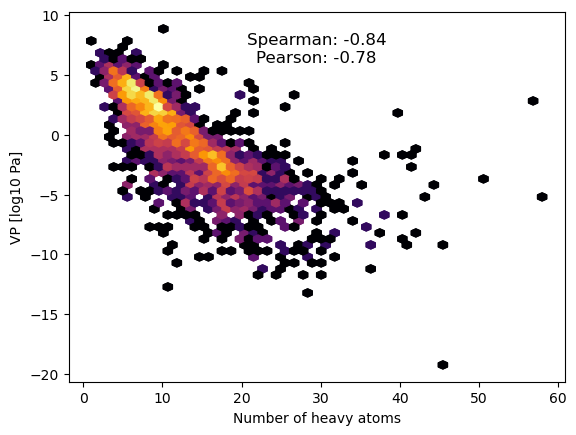

In [15]:
# plot vp against number of heavy atoms
import matplotlib.pyplot as plt
hexbin = plt.hexbin(df_features['NumHeavyAtoms'], df_features['vp_log10pa'], gridsize=50, cmap='inferno', bins='log', mincnt=1)
counts = plt.hexbin(df_features['NumHeavyAtoms'], df_features['vp_log10pa'], gridsize=50, cmap='inferno', bins='log', mincnt=1).get_array()
spearman = df_features['NumHeavyAtoms'].corr(df_features['vp_log10pa'], method='spearman')
pearson = df_features['NumHeavyAtoms'].corr(df_features['vp_log10pa'], method='pearson')
plt.text(0.5, 0.9, f'Spearman: {np.round(spearman, 2)}\nPearson: {np.round(pearson, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Number of heavy atoms')
plt.ylabel('VP [log10 Pa]')
plt.show()

In [16]:
counts = hexbin.get_array()
bin_positions = hexbin.get_offsets()

# Get the indices of bins where the count is 1
single_point_bins = np.where(counts == 1)

# Extract the corresponding points
single_point_coordinates = bin_positions[single_point_bins]

# Print or use the result as needed
print("Points where counts are 1:")
print(len(single_point_coordinates))

Points where counts are 1:
179


In [17]:
#get linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_features['NumHeavyAtoms'].values.reshape(-1, 1), df_features['vp_log10pa'].values.reshape(-1, 1))
print(f'Linear regression: {lr.coef_[0][0]}x + {lr.intercept_[0]}')


Linear regression: -0.42398567162021206x + 5.066915039574392


/tmp/ipykernel_448173/4235820320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furthest_points['residuals'] = residuals.iloc[sorted_indices]


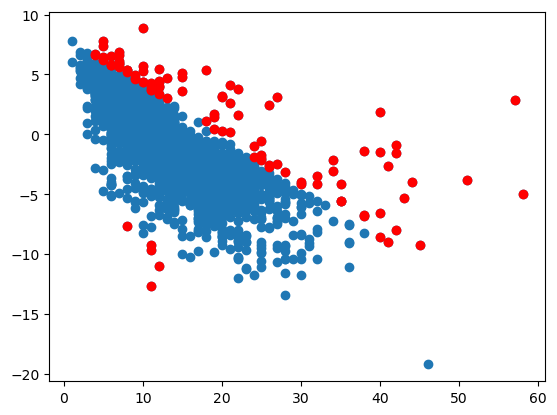

In [18]:
# Calculate the residuals
residuals = df_features['vp_log10pa'] - (-0.42398567162021217 * df_features['NumHeavyAtoms'] + 2.066915039574393)
sorted_indices = np.argsort(np.abs(residuals))[::-1]
furthest_points = df_features.iloc[sorted_indices]
furthest_points['residuals'] = residuals.iloc[sorted_indices]
mols_sorted_by_error = [Chem.MolFromMolBlock(molblock) for molblock in furthest_points['molblock']]
# Draw.MolsToGridImage(mols_sorted_by_error[:10], molsPerRow=5, subImgSize=(200, 200), legends=[f'{np.round(residual, 2)}' for residual in furthest_points['residuals'][:10]])
hunderd_furthest_points = furthest_points.iloc[:100]
plt.scatter(df_features['NumHeavyAtoms'], df_features['vp_log10pa'])
plt.scatter(hunderd_furthest_points['NumHeavyAtoms'], hunderd_furthest_points['vp_log10pa'], color='red')

In [160]:
hunderd_furthest_points

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  confid  molregno  \
1211          1211          1214        1224    2340      2342   
14              14            14          14    2396      2398   
1688          1688          1694        1706    2873      2875   
2222          2222          2231        2251    3428      3430   
353            353           353         354    1472       327   
...            ...           ...         ...     ...       ...   
131            131           131         131    1252       107   
2827          2827          2837        2862    4077      4079   
2193          2193          2202        2222    3398      3400   
2338          2338          2347        2368    3546      3548   
136            136           136         136    1257       112   

                                                   mdfp         vp  \
1211  [57, 6, 3, 6, 0, 0, 0, 0, 0, 0, -1668.89855538...  -0.176128   
14    [58, 11, 0, 8, 0, 0, 0, 0, 0, 0, -585.17979718...  -8.000000   
1688  [40, 9, 1, 0, 27, 0, 0, 0, 0, 0, -9.8366249762...  -1.136677   
2222  [11, 0, 4, 3, 0, 0, 0, 0, 0, 0, -916.341934387... -15.698970   
353   [51, 6, 3, 6, 0, 0, 0, 0, 0, 0, -1503.50624064...  -6.786522   
...                                                 ...        ...   
131   [14, 1, 3, 0, 0, 0, 1, 0, 0, 0, 107.1828444171...  -9.273038   
2827  [11, 0, 0, 5, 0, 0, 0, 0, 0, 0, 188.4754799168...  -8.000037   
2193  [13, 8, 0, 4, 0, 0, 0, 0, 0, 0, -324.630425633...  -8.843492   
2338  [9, 1, 4, 3, 0, 0, 0, 0, 0, 0, 83.219642469861...  -7.109020   
136   [40, 9, 2, 3, 0, 0, 0, 0, 0, 0, -352.183876187...  -9.567031   

      NumHeavyAtoms  NumRotatableBonds  NumN  ...  DASH_homo  DASH_lumo  \
1211             57                  6     3  ...  -0.191651  -0.103393   
14               58                 11     0  ...  -0.168897  -0.112061   
1688             40                  9     1  ...  -0.192571  -0.082207   
2222             11                  0     4  ...  -0.208164  -0.109522   
353              51                  6     3  ...  -0.196142  -0.068965   
...             ...                ...   ...  ...        ...        ...   
131              14                  1     3  ...  -0.172004  -0.091094   
2827             11                  0     0  ...  -0.209347  -0.067752   
2193             13                  8     0  ...  -0.209503  -0.085501   
2338              9                  1     4  ...  -0.201907  -0.120902   
136              40                  9     2  ...  -0.164893  -0.145188   

      DASH_max_abs_mbis  DASH_avg_abs_mbis  DASH_>03_abs_mbis  DASH_dual_elec  \
1211           0.870117           0.238652           0.047619             0.0   
14             0.833496           0.238629           0.080645             0.0   
1688           0.716309           0.252563           0.150000             0.0   
2222           0.965820           0.614136           0.461538             0.0   
353            0.870117           0.243389           0.055556             0.0   
...                 ...                ...                ...             ...   
131            0.601562           0.251168           0.095238             0.0   
2827           0.666992           0.272558           0.190476             0.0   
2193           0.868164           0.313510           0.137931             0.0   
2338           0.905762           0.535511           0.454545             0.0   
136            0.760742           0.205131           0.078947             0.0   

      DASH_dual_nucl  DASH_conj  DASH_num_atoms  residuals  
1211             0.0   0.238095             126  21.924140  
14               0.0   0.274194             124  14.524254  
1688             0.0   0.000000              40  13.755835  
2222             0.0   0.846154              13 -13.102043  
353              0.0   0.277778             108  12.769832  
...              ...        ...             ...        ...  
131              0.0   0.666667              21  -5.404154  
2827      

In [19]:
furthest_points['smiles'] =furthest_points['molblock'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromMolBlock(x)))
furthest_points['inchikeys'] = furthest_points['molblock'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromMolBlock(x))) 
inchikey_to_vp = dict(zip(furthest_points['inchikeys'], furthest_points['vp_log10pa']))

/tmp/ipykernel_448173/852898472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furthest_points['smiles'] =furthest_points['molblock'].apply(lambda x: Chem.MolToSmiles(Chem.MolFromMolBlock(x)))
/tmp/ipykernel_448173/852898472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furthest_points['inchikeys'] = furthest_points['molblock'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromMolBlock(x)))


In [20]:
def canonical_smiles_from_name_or_smiles(smiles, sanitize = True):
    mol = Chem.MolFromSmiles(smiles, sanitize = sanitize)
    return Chem.MolToSmiles(mol,canonical=True, allHsExplicit=True,  kekuleSmiles = True, allBondsExplicit = True, isomericSmiles = True)

In [21]:
import pickle
import tqdm
df_reach = pd.read_csv("/localhome/cschiebroek/ShuZe/vp/data cleaning/reach_Vapour_4.csv", sep = "|", encoding='latin-1', header = 1)
cas2smiles = pickle.load(open("/localhome/cschiebroek/ShuZe/vp/data cleaning/cas_id_2_smiles.pickle", "rb"))
cas2smiles = {i:j for i,j in cas2smiles}
# mp_ochem_hashes = set([mdfptools.utils.hashing(i) for i in tqdm.tqdm_notebook(mp_df.SMILES)]) - {None}
df_reach["SMILES"] = [cas2smiles[i] if i in cas2smiles else False for i in df_reach.cas]
df_reach = df_reach[df_reach.SMILES != False]
df_reach = df_reach[[i != None for i in df_reach.SMILES]]
df_reach = df_reach[[Chem.MolFromSmiles(i) is not None for i in df_reach.SMILES]]
smiles = df_reach.SMILES.tolist()
smiles_shuzed = []
for smi in smiles:
    try:
        smiles_shuzed.append(canonical_smiles_from_name_or_smiles(smi))
    except:
        smiles_shuzed.append(smi)
df_reach['smiles_shuzed'] = smiles_shuzed
#get inchikeys
inchikeys = []
for smi in smiles:
    try:
        inchikeys.append(Chem.MolToInchiKey(Chem.MolFromSmiles(smi)))
    except:
        inchikeys.append('None')
df_reach['inchikey'] = inchikeys
df_reach

[11:35:58] WARNING: not removing hydrogen atom without neighbors
[11:35:58] WARNING: not removing hydrogen atom without neighbors
[11:35:58] WARNING: not removing hydrogen atom without neighbors
[11:35:58] WARNING: not removing hydrogen atom without neighbors
[11:35:58] WARNING: not removing hydrogen atom without neighbors
[11:35:58] WARNING: not removing hydrogen atom without neighbors
[11:35:58] WARNING: not removing hydrogen atom without neighbors
[11:35:58] SMILES Parse Error: syntax error while parsing: C[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(CC)CCCC)|[S]CC(=O)OCC(CC)CCCC
[11:35:58] SMILES Parse Error: Failed parsing SMILES 'C[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(CC)CCCC)|[S]CC(=O)OCC(CC)CCCC' for input: 'C[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(CC)CCCC)|[S]CC(=O)OCC(CC)CCCC'
[11:35:58] SMILES Parse Error: syntax error while parsing: C[Sn](|[S]CC(=O)OCC(CC)CCCC)(|[S]CC(=O)OCC(CC)CCCC)|[S]CC(=O)OCC(CC)CCCC
[11:35:58] SMILES Parse Error: Failed parsing SMILES 'C[Sn](|[S]CC(

#name        cas  \
0             Ô_-alanine   107-95-9   
1             Ô_-alanine   107-95-9   
2       Ô_-butyrolactone    96-48-0   
3       Ô_-butyrolactone    96-48-0   
4       Ô_-butyrolactone    96-48-0   
...                  ...        ...   
6127       vinyl laurate  2146-71-6   
6128       vinyl laurate  2146-71-6   
6130  vinylene carbonate   872-36-6   
6131            warfarin    81-81-2   
6132              xylose    58-86-6   

                                           iupacName  P (upperQualifier)  \
0                              3-Aminopropionic acid                 NaN   
1                              3-Aminopropionic acid                 NaN   
2                                       oxolan-2-one                 NaN   
3                                       oxolan-2-one                 NaN   
4                                       oxolan-2-one                 NaN   
...                                              ...                 ...   
6127                                   Vinyl laurate                 NaN   
6128                                   Vinyl laurate                 NaN   
6130                                1,3-dioxol-2-one                 NaN   
6131  (RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin                 NaN   
6132             (2S,3R,4S; 5R)-oxane-2,3,4,5-tetrol                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
0                NaN                 NaN    5.060000e-08    mm Hg   
1                NaN                 NaN    6.740000e-06       Pa   
2                NaN                 NaN    3.440000e-01      hPa   
3                NaN                 NaN    4.000000e-01      hPa   
4                NaN                 NaN    9.000000e-01      hPa   
...              ...                 ...             ...      ...   
6127             NaN                 NaN    2.800000e-01       Pa   
6128             NaN                 NaN    7.110000e-01       Pa   
6130             NaN                 NaN    3.350000e+02       Pa   
6131             NaN                 NaN    3.470000e-03       Pa   
6132             NaN                 NaN    4.900000e-05       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
0                    NaN             NaN                 NaN            25.0   
1                    NaN             NaN                 NaN            25.0   
2                    NaN             NaN                 NaN            20.0   
3                    NaN             NaN                 NaN            20.0   
4                    NaN             NaN                 NaN            20.0   
...                  ...             ...                 ...             ...   
6127                 NaN             NaN                 NaN            25.0   
6128                 NaN             NaN                 NaN            25.0   
6130                 NaN             NaN                 NaN            25.0   
6131                 NaN             NaN                 NaN            20.0   
6132                 NaN             NaN                 NaN            25.0   

     T (unit)                                  SMILES  \
0           C                               NCCC(O)=O   
1           C                               NCCC(O)=O   
2           C                               O=C1CCCO1   
3           C                               O=C1CCCO1   
4           C                               O=C1CCCO1   
...       ...                                     ...   
6127        C                    CCCCCCCCCCCC(=O)OC=C   
6128        C                    CCCCCCCCCCCC(=O)OC=C   
6130        C                              O=C1OC=CO1   
6131        C  CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O   
6132        C                        OC1COC(O)C(O)C1O   

                                          smiles_shuzed  \
0                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
1                      [NH2]-[CH2]-[CH2]-[C]

In [22]:
import pandas as pd

def convert_log10_mmHg(x):
    return 10 ** float(x) * 133.322  # Convert log10(mmHg) to Pa

unit_conversion = {
    'hPa': 100,
    'Pa': 1,
    'mm Hg': 133.322,
    'kPa': 1000,
    'mBar': 100,
    'Torr': 133.322,
    'Bar': 100000,
    'PSI': 6894.76,
    'atm': 101325,
    'log10(mmHg)': pd.NA,
    'E-03 Pa': 0.001,
    'mg/mÎ_ air': 0.000001,
    'µPa': 1e-6,
    'E-10 Pa': 1e-10,
    'E-05 Pa': 1e-5,
    'Nm-2': 1,
    'e-20 Pa': 1e-20,
    'x10-4 mmHg': 0.000133322,
    'MPa': 1e6,
    'E-8 Pa': 1e-8,
    'E-7 Pa': 1e-7,
    'no data': pd.NA,
    'E -6 Pa': 1e-6,
    'E-6 Pa': 1e-6,
    '10-3 Pa': 0.001,
    'see below': pd.NA
}

df_reach['VP_Pa'] = df_reach.apply(lambda row: row['P (lowerValue)'] * unit_conversion.get(row['P (unit)'], 1), axis=1)
#drop Na
df_reach = df_reach.dropna(subset=['VP_Pa'])
df_reach


#name        cas  \
0             Ô_-alanine   107-95-9   
1             Ô_-alanine   107-95-9   
2       Ô_-butyrolactone    96-48-0   
3       Ô_-butyrolactone    96-48-0   
4       Ô_-butyrolactone    96-48-0   
...                  ...        ...   
6127       vinyl laurate  2146-71-6   
6128       vinyl laurate  2146-71-6   
6130  vinylene carbonate   872-36-6   
6131            warfarin    81-81-2   
6132              xylose    58-86-6   

                                           iupacName  P (upperQualifier)  \
0                              3-Aminopropionic acid                 NaN   
1                              3-Aminopropionic acid                 NaN   
2                                       oxolan-2-one                 NaN   
3                                       oxolan-2-one                 NaN   
4                                       oxolan-2-one                 NaN   
...                                              ...                 ...   
6127                                   Vinyl laurate                 NaN   
6128                                   Vinyl laurate                 NaN   
6130                                1,3-dioxol-2-one                 NaN   
6131  (RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin                 NaN   
6132             (2S,3R,4S; 5R)-oxane-2,3,4,5-tetrol                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
0                NaN                 NaN    5.060000e-08    mm Hg   
1                NaN                 NaN    6.740000e-06       Pa   
2                NaN                 NaN    3.440000e-01      hPa   
3                NaN                 NaN    4.000000e-01      hPa   
4                NaN                 NaN    9.000000e-01      hPa   
...              ...                 ...             ...      ...   
6127             NaN                 NaN    2.800000e-01       Pa   
6128             NaN                 NaN    7.110000e-01       Pa   
6130             NaN                 NaN    3.350000e+02       Pa   
6131             NaN                 NaN    3.470000e-03       Pa   
6132             NaN                 NaN    4.900000e-05       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
0                    NaN             NaN                 NaN            25.0   
1                    NaN             NaN                 NaN            25.0   
2                    NaN             NaN                 NaN            20.0   
3                    NaN             NaN                 NaN            20.0   
4                    NaN             NaN                 NaN            20.0   
...                  ...             ...                 ...             ...   
6127                 NaN             NaN                 NaN            25.0   
6128                 NaN             NaN                 NaN            25.0   
6130                 NaN             NaN                 NaN            25.0   
6131                 NaN             NaN                 NaN            20.0   
6132                 NaN             NaN                 NaN            25.0   

     T (unit)                                  SMILES  \
0           C                               NCCC(O)=O   
1           C                               NCCC(O)=O   
2           C                               O=C1CCCO1   
3           C                               O=C1CCCO1   
4           C                               O=C1CCCO1   
...       ...                                     ...   
6127        C                    CCCCCCCCCCCC(=O)OC=C   
6128        C                    CCCCCCCCCCCC(=O)OC=C   
6130        C                              O=C1OC=CO1   
6131        C  CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O   
6132        C                        OC1COC(O)C(O)C1O   

                                          smiles_shuzed  \
0                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
1                      [NH2]-[CH2]-[CH2]-[C]

In [23]:
#transform to log10
df_reach['VP_Pa'] = df_reach['VP_Pa'].apply(lambda x: np.log10(x))
#rename accordingly
df_reach = df_reach.rename(columns={'VP_Pa': 'VP log10Pa REACH converted'})
df_reach

/tmp/ipykernel_448173/1262425252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reach['VP_Pa'] = df_reach['VP_Pa'].apply(lambda x: np.log10(x))


#name        cas  \
0             Ô_-alanine   107-95-9   
1             Ô_-alanine   107-95-9   
2       Ô_-butyrolactone    96-48-0   
3       Ô_-butyrolactone    96-48-0   
4       Ô_-butyrolactone    96-48-0   
...                  ...        ...   
6127       vinyl laurate  2146-71-6   
6128       vinyl laurate  2146-71-6   
6130  vinylene carbonate   872-36-6   
6131            warfarin    81-81-2   
6132              xylose    58-86-6   

                                           iupacName  P (upperQualifier)  \
0                              3-Aminopropionic acid                 NaN   
1                              3-Aminopropionic acid                 NaN   
2                                       oxolan-2-one                 NaN   
3                                       oxolan-2-one                 NaN   
4                                       oxolan-2-one                 NaN   
...                                              ...                 ...   
6127                                   Vinyl laurate                 NaN   
6128                                   Vinyl laurate                 NaN   
6130                                1,3-dioxol-2-one                 NaN   
6131  (RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin                 NaN   
6132             (2S,3R,4S; 5R)-oxane-2,3,4,5-tetrol                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
0                NaN                 NaN    5.060000e-08    mm Hg   
1                NaN                 NaN    6.740000e-06       Pa   
2                NaN                 NaN    3.440000e-01      hPa   
3                NaN                 NaN    4.000000e-01      hPa   
4                NaN                 NaN    9.000000e-01      hPa   
...              ...                 ...             ...      ...   
6127             NaN                 NaN    2.800000e-01       Pa   
6128             NaN                 NaN    7.110000e-01       Pa   
6130             NaN                 NaN    3.350000e+02       Pa   
6131             NaN                 NaN    3.470000e-03       Pa   
6132             NaN                 NaN    4.900000e-05       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
0                    NaN             NaN                 NaN            25.0   
1                    NaN             NaN                 NaN            25.0   
2                    NaN             NaN                 NaN            20.0   
3                    NaN             NaN                 NaN            20.0   
4                    NaN             NaN                 NaN            20.0   
...                  ...             ...                 ...             ...   
6127                 NaN             NaN                 NaN            25.0   
6128                 NaN             NaN                 NaN            25.0   
6130                 NaN             NaN                 NaN            25.0   
6131                 NaN             NaN                 NaN            20.0   
6132                 NaN             NaN                 NaN            25.0   

     T (unit)                                  SMILES  \
0           C                               NCCC(O)=O   
1           C                               NCCC(O)=O   
2           C                               O=C1CCCO1   
3           C                               O=C1CCCO1   
4           C                               O=C1CCCO1   
...       ...                                     ...   
6127        C                    CCCCCCCCCCCC(=O)OC=C   
6128        C                    CCCCCCCCCCCC(=O)OC=C   
6130        C                              O=C1OC=CO1   
6131        C  CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O   
6132        C                        OC1COC(O)C(O)C1O   

                                          smiles_shuzed  \
0                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
1                      [NH2]-[CH2]-[CH2]-[C]

In [24]:
df_reach['VP log10Pa in DB'] = df_reach['inchikey'].apply(lambda x: inchikey_to_vp[x] if x in inchikey_to_vp else pd.NA)
df_reach

#name        cas  \
0             Ô_-alanine   107-95-9   
1             Ô_-alanine   107-95-9   
2       Ô_-butyrolactone    96-48-0   
3       Ô_-butyrolactone    96-48-0   
4       Ô_-butyrolactone    96-48-0   
...                  ...        ...   
6127       vinyl laurate  2146-71-6   
6128       vinyl laurate  2146-71-6   
6130  vinylene carbonate   872-36-6   
6131            warfarin    81-81-2   
6132              xylose    58-86-6   

                                           iupacName  P (upperQualifier)  \
0                              3-Aminopropionic acid                 NaN   
1                              3-Aminopropionic acid                 NaN   
2                                       oxolan-2-one                 NaN   
3                                       oxolan-2-one                 NaN   
4                                       oxolan-2-one                 NaN   
...                                              ...                 ...   
6127                                   Vinyl laurate                 NaN   
6128                                   Vinyl laurate                 NaN   
6130                                1,3-dioxol-2-one                 NaN   
6131  (RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin                 NaN   
6132             (2S,3R,4S; 5R)-oxane-2,3,4,5-tetrol                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
0                NaN                 NaN    5.060000e-08    mm Hg   
1                NaN                 NaN    6.740000e-06       Pa   
2                NaN                 NaN    3.440000e-01      hPa   
3                NaN                 NaN    4.000000e-01      hPa   
4                NaN                 NaN    9.000000e-01      hPa   
...              ...                 ...             ...      ...   
6127             NaN                 NaN    2.800000e-01       Pa   
6128             NaN                 NaN    7.110000e-01       Pa   
6130             NaN                 NaN    3.350000e+02       Pa   
6131             NaN                 NaN    3.470000e-03       Pa   
6132             NaN                 NaN    4.900000e-05       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
0                    NaN             NaN                 NaN            25.0   
1                    NaN             NaN                 NaN            25.0   
2                    NaN             NaN                 NaN            20.0   
3                    NaN             NaN                 NaN            20.0   
4                    NaN             NaN                 NaN            20.0   
...                  ...             ...                 ...             ...   
6127                 NaN             NaN                 NaN            25.0   
6128                 NaN             NaN                 NaN            25.0   
6130                 NaN             NaN                 NaN            25.0   
6131                 NaN             NaN                 NaN            20.0   
6132                 NaN             NaN                 NaN            25.0   

     T (unit)                                  SMILES  \
0           C                               NCCC(O)=O   
1           C                               NCCC(O)=O   
2           C                               O=C1CCCO1   
3           C                               O=C1CCCO1   
4           C                               O=C1CCCO1   
...       ...                                     ...   
6127        C                    CCCCCCCCCCCC(=O)OC=C   
6128        C                    CCCCCCCCCCCC(=O)OC=C   
6130        C                              O=C1OC=CO1   
6131        C  CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O   
6132        C                        OC1COC(O)C(O)C1O   

                                          smiles_shuzed  \
0                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
1                      [NH2]-[CH2]-[CH2]-[C]

In [25]:
df_reach['diff reach and db'] = abs(df_reach['VP log10Pa in DB'] - df_reach['VP log10Pa REACH converted'])
# df_reach.sort_values(by='diff reach and db', inplace=True, ascending=False)
df_reach

#name        cas  \
0             Ô_-alanine   107-95-9   
1             Ô_-alanine   107-95-9   
2       Ô_-butyrolactone    96-48-0   
3       Ô_-butyrolactone    96-48-0   
4       Ô_-butyrolactone    96-48-0   
...                  ...        ...   
6127       vinyl laurate  2146-71-6   
6128       vinyl laurate  2146-71-6   
6130  vinylene carbonate   872-36-6   
6131            warfarin    81-81-2   
6132              xylose    58-86-6   

                                           iupacName  P (upperQualifier)  \
0                              3-Aminopropionic acid                 NaN   
1                              3-Aminopropionic acid                 NaN   
2                                       oxolan-2-one                 NaN   
3                                       oxolan-2-one                 NaN   
4                                       oxolan-2-one                 NaN   
...                                              ...                 ...   
6127                                   Vinyl laurate                 NaN   
6128                                   Vinyl laurate                 NaN   
6130                                1,3-dioxol-2-one                 NaN   
6131  (RS)-4-hydroxy-3-(3-oxo-1-phenylbutyl)coumarin                 NaN   
6132             (2S,3R,4S; 5R)-oxane-2,3,4,5-tetrol                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
0                NaN                 NaN    5.060000e-08    mm Hg   
1                NaN                 NaN    6.740000e-06       Pa   
2                NaN                 NaN    3.440000e-01      hPa   
3                NaN                 NaN    4.000000e-01      hPa   
4                NaN                 NaN    9.000000e-01      hPa   
...              ...                 ...             ...      ...   
6127             NaN                 NaN    2.800000e-01       Pa   
6128             NaN                 NaN    7.110000e-01       Pa   
6130             NaN                 NaN    3.350000e+02       Pa   
6131             NaN                 NaN    3.470000e-03       Pa   
6132             NaN                 NaN    4.900000e-05       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
0                    NaN             NaN                 NaN            25.0   
1                    NaN             NaN                 NaN            25.0   
2                    NaN             NaN                 NaN            20.0   
3                    NaN             NaN                 NaN            20.0   
4                    NaN             NaN                 NaN            20.0   
...                  ...             ...                 ...             ...   
6127                 NaN             NaN                 NaN            25.0   
6128                 NaN             NaN                 NaN            25.0   
6130                 NaN             NaN                 NaN            25.0   
6131                 NaN             NaN                 NaN            20.0   
6132                 NaN             NaN                 NaN            25.0   

     T (unit)                                  SMILES  \
0           C                               NCCC(O)=O   
1           C                               NCCC(O)=O   
2           C                               O=C1CCCO1   
3           C                               O=C1CCCO1   
4           C                               O=C1CCCO1   
...       ...                                     ...   
6127        C                    CCCCCCCCCCCC(=O)OC=C   
6128        C                    CCCCCCCCCCCC(=O)OC=C   
6130        C                              O=C1OC=CO1   
6131        C  CC(=O)CC(c1ccccc1)C2=C(O)Oc3ccccc3C2=O   
6132        C                        OC1COC(O)C(O)C1O   

                                          smiles_shuzed  \
0                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
1                      [NH2]-[CH2]-[CH2]-[C]

In [26]:
#drop where diff is inf or nan
df_reach = df_reach.dropna(subset=['diff reach and db'])
df_reach = df_reach[df_reach['diff reach and db'] != np.inf]
df_reach

#name       cas                        iupacName  \
0             Ô_-alanine  107-95-9            3-Aminopropionic acid   
1             Ô_-alanine  107-95-9            3-Aminopropionic acid   
2       Ô_-butyrolactone   96-48-0                     oxolan-2-one   
3       Ô_-butyrolactone   96-48-0                     oxolan-2-one   
4       Ô_-butyrolactone   96-48-0                     oxolan-2-one   
...                  ...       ...                              ...   
6117            vanillin  121-33-5  4-hydroxy-3-methoxybenzaldehyde   
6118            vanillin  121-33-5  4-hydroxy-3-methoxybenzaldehyde   
6124       vinyl acetate  108-05-4                    vinyl acetate   
6125       vinyl acetate  108-05-4                    vinyl acetate   
6130  vinylene carbonate  872-36-6                 1,3-dioxol-2-one   

      P (upperQualifier)  P (upperValue)  P (lowerQualifier)  P (lowerValue)  \
0                    NaN             NaN                 NaN    5.060000e-08   
1                    NaN             NaN                 NaN    6.740000e-06   
2                    NaN             NaN                 NaN    3.440000e-01   
3                    NaN             NaN                 NaN    4.000000e-01   
4                    NaN             NaN                 NaN    9.000000e-01   
...                  ...             ...                 ...             ...   
6117                 NaN             NaN                 NaN    2.900000e-03   
6118                 NaN             NaN                 NaN    4.460000e-03   
6124                 NaN             NaN                 NaN    1.130000e+02   
6125                 NaN             NaN                 NaN    1.170000e+01   
6130                 NaN             NaN                 NaN    3.350000e+02   

     P (unit)  T (upperQualifier)  T (upperValue)  T (lowerQualifier)  \
0       mm Hg                 NaN             NaN                 NaN   
1          Pa                 NaN             NaN                 NaN   
2         hPa                 NaN             NaN                 NaN   
3         hPa                 NaN             NaN                 NaN   
4         hPa                 NaN             NaN                 NaN   
...       ...                 ...             ...                 ...   
6117      hPa                 NaN             NaN                 NaN   
6118      hPa                 NaN             NaN                 NaN   
6124      hPa                 NaN             NaN                 NaN   
6125      kPa                 NaN             NaN                 NaN   
6130       Pa                 NaN             NaN                 NaN   

      T (lowerValue) T (unit)            SMILES  \
0               25.0        C         NCCC(O)=O   
1               25.0        C         NCCC(O)=O   
2               20.0        C         O=C1CCCO1   
3               20.0        C         O=C1CCCO1   
4               20.0        C         O=C1CCCO1   
...              ...      ...               ...   
6117            25.0        C  COc1cc(C=O)ccc1O   
6118            25.0        C  COc1cc(C=O)ccc1O   
6124            20.0        C        CC(=O)OC=C   
6125            20.0        C        CC(=O)OC=C   
6130            25.0        C        O=C1OC=CO1   

                                          smiles_shuzed  \
0                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
1                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
2                      [O]=[C]1-[CH2]-[CH2]-[CH2]-[O]-1   
3                      [O]=[C]1-[CH2]-[CH2]-[CH2]-[O]-1   
4                      [O]=[C]1-[CH2]-[CH2]-[CH2]-[O]-1   
...                                                 ...   
6117  [CH3]-[O]-[C]1=[CH]-[C](-[CH]=[O])=[CH]-[CH]=[...   
6118  [CH3]-[O]-[C]1=[CH]-[C](-[CH]=[O])=[CH]-[CH]=[...   
6124                     [CH2]=[CH]-[O]-[C](-[CH3])=[O]   
6125                     [CH2]=[CH]-[O]-[C](-[CH3])=[O]   
6130                       [O]=[C]1-[O]-[CH]=[CH]-[O]-1   

      

In [27]:
#drop duplicates: same inchikey and VP log10Pa REACH converted value
df_reach = df_reach.drop_duplicates(subset=['inchikey', 'VP log10Pa REACH converted'])
df_reach

#name       cas                        iupacName  \
0             Ô_-alanine  107-95-9            3-Aminopropionic acid   
1             Ô_-alanine  107-95-9            3-Aminopropionic acid   
2       Ô_-butyrolactone   96-48-0                     oxolan-2-one   
3       Ô_-butyrolactone   96-48-0                     oxolan-2-one   
4       Ô_-butyrolactone   96-48-0                     oxolan-2-one   
...                  ...       ...                              ...   
6117            vanillin  121-33-5  4-hydroxy-3-methoxybenzaldehyde   
6118            vanillin  121-33-5  4-hydroxy-3-methoxybenzaldehyde   
6124       vinyl acetate  108-05-4                    vinyl acetate   
6125       vinyl acetate  108-05-4                    vinyl acetate   
6130  vinylene carbonate  872-36-6                 1,3-dioxol-2-one   

      P (upperQualifier)  P (upperValue)  P (lowerQualifier)  P (lowerValue)  \
0                    NaN             NaN                 NaN    5.060000e-08   
1                    NaN             NaN                 NaN    6.740000e-06   
2                    NaN             NaN                 NaN    3.440000e-01   
3                    NaN             NaN                 NaN    4.000000e-01   
4                    NaN             NaN                 NaN    9.000000e-01   
...                  ...             ...                 ...             ...   
6117                 NaN             NaN                 NaN    2.900000e-03   
6118                 NaN             NaN                 NaN    4.460000e-03   
6124                 NaN             NaN                 NaN    1.130000e+02   
6125                 NaN             NaN                 NaN    1.170000e+01   
6130                 NaN             NaN                 NaN    3.350000e+02   

     P (unit)  T (upperQualifier)  T (upperValue)  T (lowerQualifier)  \
0       mm Hg                 NaN             NaN                 NaN   
1          Pa                 NaN             NaN                 NaN   
2         hPa                 NaN             NaN                 NaN   
3         hPa                 NaN             NaN                 NaN   
4         hPa                 NaN             NaN                 NaN   
...       ...                 ...             ...                 ...   
6117      hPa                 NaN             NaN                 NaN   
6118      hPa                 NaN             NaN                 NaN   
6124      hPa                 NaN             NaN                 NaN   
6125      kPa                 NaN             NaN                 NaN   
6130       Pa                 NaN             NaN                 NaN   

      T (lowerValue) T (unit)            SMILES  \
0               25.0        C         NCCC(O)=O   
1               25.0        C         NCCC(O)=O   
2               20.0        C         O=C1CCCO1   
3               20.0        C         O=C1CCCO1   
4               20.0        C         O=C1CCCO1   
...              ...      ...               ...   
6117            25.0        C  COc1cc(C=O)ccc1O   
6118            25.0        C  COc1cc(C=O)ccc1O   
6124            20.0        C        CC(=O)OC=C   
6125            20.0        C        CC(=O)OC=C   
6130            25.0        C        O=C1OC=CO1   

                                          smiles_shuzed  \
0                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
1                      [NH2]-[CH2]-[CH2]-[C](=[O])-[OH]   
2                      [O]=[C]1-[CH2]-[CH2]-[CH2]-[O]-1   
3                      [O]=[C]1-[CH2]-[CH2]-[CH2]-[O]-1   
4                      [O]=[C]1-[CH2]-[CH2]-[CH2]-[O]-1   
...                                                 ...   
6117  [CH3]-[O]-[C]1=[CH]-[C](-[CH]=[O])=[CH]-[CH]=[...   
6118  [CH3]-[O]-[C]1=[CH]-[C](-[CH]=[O])=[CH]-[CH]=[...   
6124                     [CH2]=[CH]-[O]-[C](-[CH3])=[O]   
6125                     [CH2]=[CH]-[O]-[C](-[CH3])=[O]   
6130                       [O]=[C]1-[O]-[CH]=[CH]-[O]-1   

      

In [28]:
#sort by difference
df_reach.sort_values(by='diff reach and db', inplace=True, ascending=False)
df_reach

/tmp/ipykernel_448173/1592104123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reach.sort_values(by='diff reach and db', inplace=True, ascending=False)


#name          cas  \
5372                                      octadec-1-ene     112-88-9   
5366                                      octadec-1-ene     112-88-9   
4113                          ethane-1,2-diyl palmitate     624-03-3   
3409  butyl 2-{[3-(trifluoromethyl)phenyl]amino}benz...   67330-25-0   
5379                                         octadecene   27070-58-2   
...                                                 ...          ...   
2501  4-(4-amino-2-chloro-3,5-diethylbenzyl)-3-chlor...  106246-33-7   
2536  4-amino-2,5-dimethoxy-N-phenylbenzenesulphonamide   52298-44-9   
2546  4-amino-N-(1,1-dimethylethyl)-4,5-dihydro-3-(1...  129909-90-6   
2569                    4-chloro-4'-hydroxybenzophenone   42019-78-3   
6130                                 vinylene carbonate     872-36-6   

                                              iupacName  P (upperQualifier)  \
5372                                      octadec-1-ene                 NaN   
5366                                      octadec-1-ene                 NaN   
4113            Hexadecanoic acid, 1,2-ethanediyl ester                 NaN   
3409  butyl 2-{[3-(trifluoromethyl)phenyl]amino}benz...                 NaN   
5379                                         Octadecene                 NaN   
...                                                 ...                 ...   
2501  4-(4-amino-2-chloro-3,5-diethylbenzyl)-3-chlor...                 NaN   
2536   4-amino-2,5-dimethoxy-N-phenylbenzenesulfonamide                 NaN   
2546  4-amino-N-(1,1-dimethylethyl)-4,5-dihydro-3-(1...                 NaN   
2569         (4-chlorophenyl)(4-hydroxyphenyl)methanone                 NaN   
6130                                   1,3-dioxol-2-one                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
5372             NaN                 NaN    2.490000e+04       Pa   
5366             NaN                 NaN    2.020000e+04       Pa   
4113             NaN                 NaN    1.000000e-13       Pa   
3409             NaN                 NaN    5.700000e+00      hPa   
5379             NaN                 NaN    8.800000e+01     mBar   
...              ...                 ...             ...      ...   
2501             NaN                 NaN    1.000000e-04       Pa   
2536             NaN                 NaN    2.600000e-04      µPa   
2546             NaN                 NaN    3.000000e-06       Pa   
2569             NaN                 NaN    2.740000e-04       Pa   
6130             NaN                 NaN    3.350000e+02       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
5372                 NaN             NaN                 NaN            25.0   
5366                 NaN             NaN                 NaN            20.0   
4113                 NaN             NaN                 NaN            20.0   
3409                 NaN             NaN                 NaN            20.0   
5379                 NaN             NaN                 NaN            20.0   
...                  ...             ...                 ...             ...   
2501                 NaN             NaN                 NaN            25.0   
2536                 NaN             NaN                 NaN            25.0   
2546                 NaN             NaN                 NaN            25.0   
2569                 NaN             NaN                 NaN            25.0   
6130                 NaN             NaN                 NaN            25.0   

     T (unit)                                        SMILES  \
5372        C                           CCCCCCCCCCCCCCCCC=C   
5366        C                           CCCCCCCCCCCCCCCCC=C   
4113        C  CCCCCCCCCCCCCCCC(=O)OCCOC(=O)CCCCCCCCCCCCCCC   
3409        C         CCCCOC(=O)c1ccccc1Nc2cccc(c2)C(F)(F)F   
5379        C                           CCCCCCCCCCCCCCCCC=C   
...       ...                                           ...   
2501 

In [29]:
df_reach['T (unit)'].value_counts()
df_reach['T (lowerValue)'].value_counts()
#only keep where combination of T (unit) and T (lowerValue) is C 25 or K 298.15
df_reach_25 = df_reach[(df_reach['T (unit)'] == 'C') & (df_reach['T (lowerValue)'] == 25) | (df_reach['T (unit)'] == 'K') & (df_reach['T (lowerValue)'] == 298.15)]
df_reach_25


#name          cas  \
5372                                      octadec-1-ene     112-88-9   
3666                                    cyclohexylamine     108-91-8   
5779                                  terephthalic acid     100-21-0   
5356                                          oct-1-ene     111-66-0   
4523                                     icosanoic acid     506-30-9   
...                                                 ...          ...   
2501  4-(4-amino-2-chloro-3,5-diethylbenzyl)-3-chlor...  106246-33-7   
2536  4-amino-2,5-dimethoxy-N-phenylbenzenesulphonamide   52298-44-9   
2546  4-amino-N-(1,1-dimethylethyl)-4,5-dihydro-3-(1...  129909-90-6   
2569                    4-chloro-4'-hydroxybenzophenone   42019-78-3   
6130                                 vinylene carbonate     872-36-6   

                                              iupacName  P (upperQualifier)  \
5372                                      octadec-1-ene                 NaN   
3666                                    cyclohexanamine                 NaN   
5779                                  terephthalic acid                 NaN   
5356                                          oct-1-ene                 NaN   
4523                                     icosanoic acid                 NaN   
...                                                 ...                 ...   
2501  4-(4-amino-2-chloro-3,5-diethylbenzyl)-3-chlor...                 NaN   
2536   4-amino-2,5-dimethoxy-N-phenylbenzenesulfonamide                 NaN   
2546  4-amino-N-(1,1-dimethylethyl)-4,5-dihydro-3-(1...                 NaN   
2569         (4-chlorophenyl)(4-hydroxyphenyl)methanone                 NaN   
6130                                   1,3-dioxol-2-one                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
5372             NaN                 NaN    2.490000e+04       Pa   
3666             NaN                 NaN    2.826000e-03       Pa   
5779             NaN                 NaN    2.590000e-11    mm Hg   
5356             NaN                 NaN    1.700000e-02       Pa   
4523             NaN                 NaN    1.930000e-02       Pa   
...              ...                 ...             ...      ...   
2501             NaN                 NaN    1.000000e-04       Pa   
2536             NaN                 NaN    2.600000e-04      µPa   
2546             NaN                 NaN    3.000000e-06       Pa   
2569             NaN                 NaN    2.740000e-04       Pa   
6130             NaN                 NaN    3.350000e+02       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
5372                 NaN             NaN                 NaN            25.0   
3666                 NaN             NaN                 NaN            25.0   
5779                 NaN             NaN                 NaN            25.0   
5356                 NaN             NaN                 NaN            25.0   
4523                 NaN             NaN                 NaN            25.0   
...                  ...             ...                 ...             ...   
2501                 NaN             NaN                 NaN            25.0   
2536                 NaN             NaN                 NaN            25.0   
2546                 NaN             NaN                 NaN            25.0   
2569                 NaN             NaN                 NaN            25.0   
6130                 NaN             NaN                 NaN            25.0   

     T (unit)                                       SMILES  \
5372        C                          CCCCCCCCCCCCCCCCC=C   
3666        C                                    NC1CCCCC1   
5779        C                       OC(=O)c1ccc(cc1)C(O)=O   
5356        C                                    CCCCCCC=C   
4523        C                    CCCCCCCCCCCCCCCCCCCC(O)=O   
...       ...                                          ...   
2501        

In [30]:
df_reach_25[df_reach_25['SMILES'] == 'CCCCCCCCCCCCCCCCC=C']

#name         cas      iupacName  P (upperQualifier)  \
5372  octadec-1-ene    112-88-9  octadec-1-ene                 NaN   
5373  octadec-1-ene    112-88-9  octadec-1-ene                 NaN   
5374  octadec-1-ene    112-88-9  octadec-1-ene                 NaN   
5375  octadec-1-ene    112-88-9  octadec-1-ene                 NaN   
5384     octadecene  27070-58-2     Octadecene                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
5372             NaN                 NaN     24900.00000       Pa   
5373             NaN                 NaN       604.00000       Pa   
5374             NaN                 NaN         2.00000       Pa   
5375             NaN                 NaN         0.01995      hPa   
5384             NaN                 NaN         0.01900       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
5372                 NaN             NaN                 NaN            25.0   
5373                 NaN             NaN                 NaN            25.0   
5374                 NaN             NaN                 NaN            25.0   
5375                 NaN             NaN                 NaN            25.0   
5384                 NaN             NaN                 NaN            25.0   

     T (unit)               SMILES  \
5372        C  CCCCCCCCCCCCCCCCC=C   
5373        C  CCCCCCCCCCCCCCCCC=C   
5374        C  CCCCCCCCCCCCCCCCC=C   
5375        C  CCCCCCCCCCCCCCCCC=C   
5384        C  CCCCCCCCCCCCCCCCC=C   

                                          smiles_shuzed  \
5372  [CH2]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]...   
5373  [CH2]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]...   
5374  [CH2]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]...   
5375  [CH2]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]...   
5384  [CH2]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]...   

                         inchikey  VP log10Pa REACH converted  \
5372  CCCMONHAUSKTEQ-UHFFFAOYSA-N                    4.396199   
5373  CCCMONHAUSKTEQ-UHFFFAOYSA-N                    2.781037   
5374  CCCMONHAUSKTEQ-UHFFFAOYSA-N                    0.301030   
5375  CCCMONHAUSKTEQ-UHFFFAOYSA-N                    0.299943   
5384  CCCMONHAUSKTEQ-UHFFFAOYSA-N                   -1.721246   

     VP log10Pa in DB diff reach and db  
5372        -2.047897          6.444097  
5373        -2.047897          4.828934  
5374        -2.047897          2.348927  
5375        -2.047897           2.34784  
5384        -2.047897          0.326651

In [31]:
df_features_cleaner = df_features.drop(hunderd_furthest_points.index)


In [32]:
df_features_cleaner

confid  molregno                                               mdfp  \
0       2298         1  [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.4462820500696...   
1       1228         6  [30, 19, 0, 6, 0, 0, 0, 0, 0, 0, 110.748466359...   
2       1150         7  [9, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7.3614322526332...   
3       1151         8  [13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97.7987770071...   
4       1152         9  [5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.4848459757350...   
...      ...       ...                                                ...   
2973    4236      4238  [9, 0, 1, 0, 0, 0, 0, 0, 0, 0, -124.1646445639...   
2974    4237      4239  [6, 2, 0, 3, 0, 0, 0, 0, 0, 0, 103.38549113357...   
2975    4238      4240  [18, 2, 0, 1, 0, 0, 0, 0, 5, 0, -20.9569257949...   
2976    4239      4241  [17, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0.034004099168...   
2977    4240      4242  [19, 2, 0, 1, 0, 0, 0, 6, 0, 0, -30.8042543707...   

      NumHeavyAtoms  NumRotatableBonds  NumN  NumO  NumF  NumP  NumS  NumCl  \
0                 6                  0     0     0     0     0     0      0   
1                30                 19     0     6     0     0     0      0   
2                 9                  5     0     0     0     0     0      0   
3                13                  1     0     2     0     0     0      0   
4                 5                  2     0     1     0     0     0      2   
...             ...                ...   ...   ...   ...   ...   ...    ...   
2973              9                  0     1     0     0     0     0      0   
2974              6                  2     0     3     0     0     0      0   
2975             18                  2     0     1     0     0     0      0   
2976             17                  0     0     1     0     0     0      4   
2977             19                  2     0     1     0     0     0      6   

      NumBr  NumI  water_intra_crf_mean  water_intra_crf_std  \
0         0     0              8.446282             0.080879   
1         0     0            110.748466            14.676086   
2         0     0              7.361432             0.283715   
3         0     0            -97.798777             3.120328   
4         0     0              0.484846             5.061253   
...     ...   ...                   ...                  ...   
2973      0     0           -124.164645             0.942939   
2974      0     0            103.385491            12.919604   
2975      5     0            -20.956926             0.766430   
2976      0     0              0.034004             0.524144   
2977      0     0            -30.804254             1.535323   

      water_intra_crf_median  water_intra_lj_mean  water_intra_lj_std  \
0                   8.440275            22.412070            0.552235   
1                 111.336041            50.513654           11.160768   
2                   7.340421            14.033742            5.018821   
3                 -97.814706            50.244232            3.095426   
4                   0.129270             1.654325            2.164057   
...                      ...                  ...                 ...   
2973             -124.082327            36.961421            3.979846   
2974              104.009496             6.084850            3.670216   
2975              -20.936888            51.083508            4.185931   
2976                0.047604            36.140118            1.460556   
2977              -30.793098            50.635848            5.328190   

      water_intra_lj_median  water_total_crf_mean  water_total_crf_std  \
0                 22.280228            -17.546330             9.834489   
1                 49.678791           -129.969089            31.348099   
2                 13.296542              3.017586             4.353506   
3                 49.997608           -256.155382            22.789790   
4                  1.141728            -39.688778            11.480149   
...                     ...               

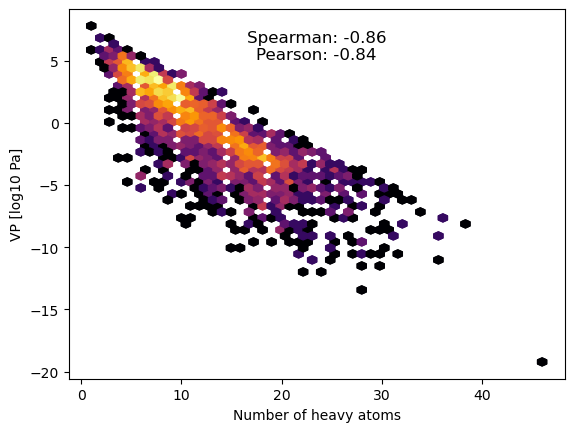

In [33]:
#plot vp against number of heavy atoms
import matplotlib.pyplot as plt
hexbin = plt.hexbin(df_features_cleaner['NumHeavyAtoms'], df_features_cleaner['vp_log10pa'], gridsize=50, cmap='inferno', bins='log', mincnt=1)
counts = plt.hexbin(df_features_cleaner['NumHeavyAtoms'], df_features_cleaner['vp_log10pa'], gridsize=50, cmap='inferno', bins='log', mincnt=1).get_array()
spearman = df_features_cleaner['NumHeavyAtoms'].corr(df_features_cleaner['vp_log10pa'], method='spearman')
pearson = df_features['NumHeavyAtoms'].corr(df_features_cleaner['vp_log10pa'], method='pearson')
plt.text(0.5, 0.9, f'Spearman: {np.round(spearman, 2)}\nPearson: {np.round(pearson, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Number of heavy atoms')
plt.ylabel('VP [log10 Pa]')
plt.show()

In [34]:
from rdkit import Chem
import psycopg2
import pandas as pd
import psycopg2
hostname = 'scotland'
dbname = 'cs_mdfps'
username = 'cschiebroek'
import warnings
# Suppress the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
from rdkit.Chem import Descriptors
from rdkit.Chem.Descriptors import CalcMolDescriptors
import sys
sys.path.append('../..')
from carl import utils_carl
from carl.utils_carl import train_pred_xgboost_2d, getStatValues,density_plot, get_mdfps
from functools import reduce
import sys
sys.path.append('../..')
from carl import utils_carl
from carl.utils_carl import train_pred_xgboost_2d, getStatValues,density_plot, get_mdfps
from functools import reduce

In [35]:
params = {
    # Parameters that we are going to tune.
    'max_depth':3,
    'min_child_weight': 6,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    "objective" : 'reg:squarederror',
}
#load X features: carl/RDKit_2D_descriptors.pkl
RDKit_feature_names = pd.read_pickle('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/outputs/RDKit_2D_descriptors.pkl')
output_2d_only = train_pred_xgboost_2d(df_features_cleaner,params=params,X_features=RDKit_feature_names,y_label='vp_log10pa')
real_2d_only, prediction_2d_only = (reduce(lambda a,b : list(a)+list(b) , output_2d_only[0]), reduce(lambda a,b : list(a)+list(b), output_2d_only[1]))
mdfp_features_no_2d = ['water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean', 'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std', 'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median', 'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean', 'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std', 'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
output_combined = train_pred_xgboost_2d(df_features_cleaner,params=params,X_features=RDKit_feature_names+mdfp_features_no_2d,y_label='vp_log10pa')
real_combined, prediction_combined = (reduce(lambda a,b : list(a)+list(b) , output_combined[0]), reduce(lambda a,b : list(a)+list(b), output_combined[1]))
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI', 'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean', 'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std', 'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median', 'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean', 'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std', 'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
output_combined_mdfp = train_pred_xgboost_2d(df_features_cleaner,params=params,X_features=mdfp_features_all,y_label='vp_log10pa')
real_combined_mdfp, prediction_combined_mdfp = (reduce(lambda a,b : list(a)+list(b) , output_combined_mdfp[0]), reduce(lambda a,b : list(a)+list(b), output_combined_mdfp[1]))



Plot 1 Stats:
RMSE:  0.9856499304150268
MAE:  0.6665192469083145
R2:  0.9227160252359996
Plot 2 Stats:
RMSE:  1.008039465189903
MAE:  0.6678214822421198
R2:  0.9192187327047611
Plot 3 Stats:
RMSE:  1.1361801815921637
MAE:  0.7618933858839421
R2:  0.8972892216893111


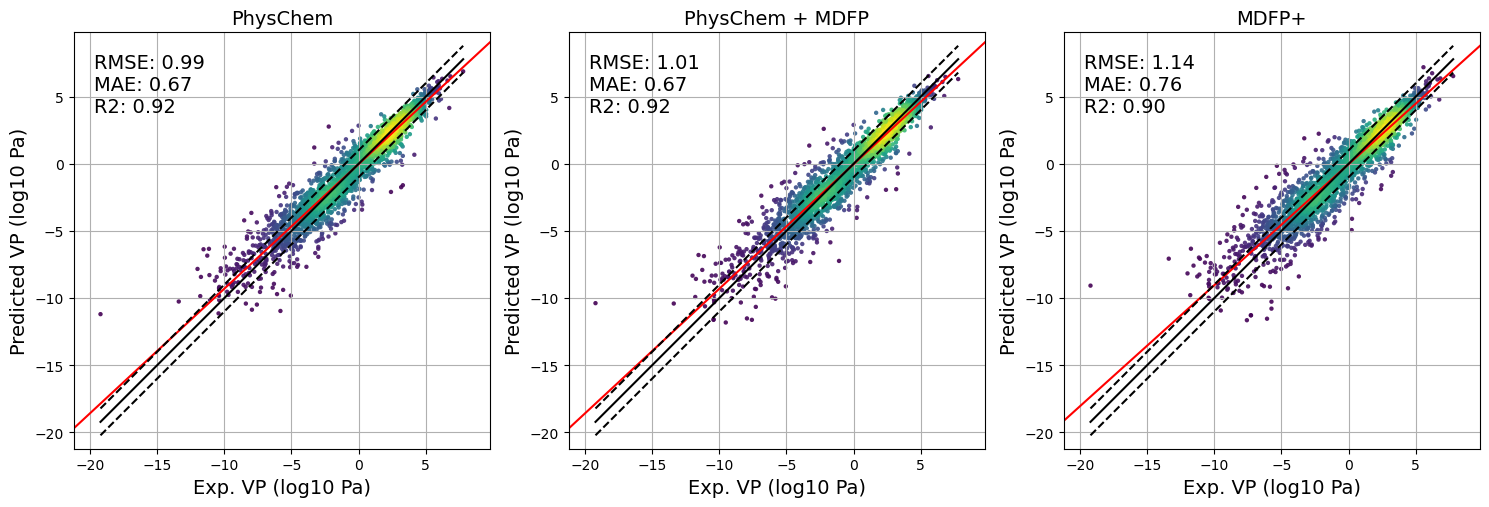

In [36]:
from carl.utils_carl import density_plot_multiple
density_plot_multiple(reals = [real_2d_only,real_combined,real_combined_mdfp],predictions=[prediction_2d_only,prediction_combined,prediction_combined_mdfp],titles = ['PhysChem','PhysChem + MDFP','MDFP+'])

In [37]:
#ochem uncleaned standardized
df_ochem = pd.read_csv('OCHEM_standardized_not_cleaned.csv')
df_reach = pd.read_csv('REACH_standardized_not_cleaned.csv')

df_reach_25 = df_reach[(df_reach['T (unit)'] == 'C') & (df_reach['T (lowerValue)'] == 25) | (df_reach['T (unit)'] == 'K') & (df_reach['T (lowerValue)'] == 298.15)]
df_ochem_25 = df_ochem[(df_ochem[df_ochem.columns[5]] == '°C') & (df_ochem['Temperature'] == 25) | (df_ochem[df_ochem.columns[5]] == 'K') & (df_ochem['Temperature'] == 298.15)]


In [38]:
furthest_points[furthest_points['smiles'] == 'C=CCCCCCCCCCCCCCCCC']

confid  molregno                                               mdfp  \
343    1505       360  [18, 15, 0, 0, 0, 0, 0, 0, 0, 0, 12.6818023978...   

     NumHeavyAtoms  NumRotatableBonds  NumN  NumO  NumF  NumP  NumS  NumCl  \
343             18                 15     0     0     0     0     0      0   

     NumBr  NumI  water_intra_crf_mean  water_intra_crf_std  \
343      0     0             12.681802             0.407823   

     water_intra_crf_median  water_intra_lj_mean  water_intra_lj_std  \
343               12.678861             30.75082            8.473232   

     water_intra_lj_median  water_total_crf_mean  water_total_crf_std  \
343              30.851161              9.109814             3.946282   

     water_total_crf_median  water_total_lj_mean  water_total_lj_std  \
343                9.647895           -87.574904           12.101874   

     water_total_lj_median  water_intra_ene_mean  water_intra_ene_std  \
343             -87.835544             43.432623             8.324038   

     water_intra_ene_median  water_total_ene_mean  water_total_ene_std  \
343                43.46376             -78.46509            12.311046   

     water_total_ene_median  water_rgyr_mean  water_rgyr_std  \
343              -79.248821         0.468589        0.061691   

     water_rgyr_median  water_sasa_mean  water_sasa_std  water_sasa_median  \
343           0.476908         6.162603        0.338297           6.241262   

     MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
343            8.20914         8.20914           1.787913        -5.19281   

          qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
343  0.216375  252.486         216.198  252.281701                  108   

     NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
343                    0           0.05696         -0.103083   

     MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
343             0.103083              0.05696          0.833333   

     FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  \
343          1.277778          1.722222    -0.079228     -0.247881   

     BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  \
343     -0.690624      -2.74941      -0.635644       -2.595232    -0.243599   

     BCUT2D_MRLOW    AvgIpc  BalabanJ      BertzCT       Chi0  Chi0n  Chi0v  \
343     -1.174681  2.937498  7.807185  1410.752135  45.154701   45.0    9.0   

          Chi1  Chi1n  Chi1v  Chi2n  Chi2v   Chi3n   Chi3v   Chi4n   Chi4v  \
343  22.604059  22.25   4.25    2.0    2.0  0.9375  0.9375  0.4375  0.4375   

     HallKierAlpha           Ipc    Kappa1  Kappa2  Kappa3   LabuteASA  \
343          -0.26  5.557819e+09  1.787246   16.74   15.74  166.832602   

     PEOE_VSA1  PEOE_VSA10  PEOE_VSA11  PEOE_VSA12  PEOE_VSA13  PEOE_VSA14  \
343        0.0         0.0         0.0         0.0         0.0         0.0   

     PEOE_VSA2  PEOE_VSA3  PEOE_VSA4  PEOE_VSA5  PEOE_VSA6  PEOE_VSA7  \
343        0.0        0.0        0.0   6.531039  95.751988   12.74585   

     PEOE_VSA8  PEOE_VSA9   SMR_VSA1  SMR_VSA10  SMR_VSA2  SMR_VSA3  SMR_VSA4  \
343  45.235032   4.112276  49.347308        0.0       0.0       0.0       0.0   

       SMR_VSA5  SMR_VSA6   SMR_VSA7  SMR_VSA8  SMR_VSA9  SlogP_VSA1  \
343  102.445766       0.0  12.583111       0.0       0.0         0.0   

     SlogP_VSA10  SlogP_VSA11  SlogP_VSA12  SlogP_VSA2  SlogP_VSA3  \
343          0.0          0.0          0.0         0.0         0.0   

     SlogP_VSA4  SlogP_VSA5  SlogP_VSA6  SlogP_VSA7  SlogP_VSA8  SlogP_VSA9  \
343         0.0  151.793074   12.583111         0.0         0.0         0.0   

     TPSA  EState_VSA1  EState_VSA10  EState_VSA11  EState_VSA2  EState_VSA3  \
343   0.0   115.028876           0.0           0.0          0.0          0.0   

     EState_VSA4  EState_VSA5  EState_VSA6  EState_VSA7  EState_VSA8  \
343          0.0          0.0          0.0          0.0          0.0 

In [39]:
df_ochem_25[df_ochem_25['standardized_smiles'] == 'C=CCCCCCCCCCCCCCCCC']

Unnamed: 0               SMILES  Vapor Pressure {measured}  \
1106        1106  CCCCCCCCCCCCCCCCC=C                   0.000068   
3420        3420  CCCCCCCCCCCCCCCCC=C                  -2.050000   

     UNIT {Vapor Pressure}  Temperature UNIT {Temperature} comment (property)  \
1106                 mm Hg        25.00                 °C                NaN   
3420               log(Pa)       298.15                  K                NaN   

     measurement method comment (chemical) source  # of ortho chlorides  \
1106                NaN                NaN    NaN                   NaN   
3420                NaN                NaN    NaN                   NaN   

     UNIT {# of ortho chlorides} Dataset Quality code UNIT {Quality code}  \
1106                           -     NaN          NaN                   -   
3420                           -    Test          NaN                   -   

                             hash_code mdfp  Temperature_K     VP_pa  \
1106  1ecb7443404455f198ca9696f344e7d8  NaN         298.15  0.000068   
3420  1ecb7443404455f198ca9696f344e7d8  NaN         298.15 -2.050000   

      standardized_smiles  NumberOfHeavyAtoms  log10VP_pa  
1106  C=CCCCCCCCCCCCCCCCC                  18   -4.170696  
3420  C=CCCCCCCCCCCCCCCCC                  18         NaN

In [40]:
df_reach_25[df_reach_25['standardized_smiles'] == 'C=CCCCCCCCCCCCCCCCC']

#name         cas      iupacName  P (upperQualifier)  \
3896  octadec-1-ene    112-88-9  octadec-1-ene                 NaN   
3897  octadec-1-ene    112-88-9  octadec-1-ene                 NaN   
3898  octadec-1-ene    112-88-9  octadec-1-ene                 NaN   
3899  octadec-1-ene    112-88-9  octadec-1-ene                 NaN   
3906     octadecene  27070-58-2     Octadecene                 NaN   
3907     octadecene  27070-58-2     Octadecene                 NaN   
3908     octadecene  27070-58-2     Octadecene                 NaN   

      P (upperValue)  P (lowerQualifier)  P (lowerValue) P (unit)  \
3896             NaN                 NaN     24900.00000       Pa   
3897             NaN                 NaN       604.00000       Pa   
3898             NaN                 NaN         2.00000       Pa   
3899             NaN                 NaN         0.01995      hPa   
3906             NaN                 NaN         2.00000       Pa   
3907             NaN                 NaN     24900.00000       Pa   
3908             NaN                 NaN         0.01900       Pa   

      T (upperQualifier)  T (upperValue)  T (lowerQualifier)  T (lowerValue)  \
3896                 NaN             NaN                 NaN            25.0   
3897                 NaN             NaN                 NaN            25.0   
3898                 NaN             NaN                 NaN            25.0   
3899                 NaN             NaN                 NaN            25.0   
3906                 NaN             NaN                 NaN            25.0   
3907                 NaN             NaN                 NaN            25.0   
3908                 NaN             NaN                 NaN            25.0   

     T (unit)      VP_Pa  Temperature_K               SMILES  \
3896        C  24900.000         298.15  CCCCCCCCCCCCCCCCC=C   
3897        C    604.000         298.15  CCCCCCCCCCCCCCCCC=C   
3898        C      2.000         298.15  CCCCCCCCCCCCCCCCC=C   
3899        C      1.995         298.15  CCCCCCCCCCCCCCCCC=C   
3906        C      2.000         298.15  CCCCCCCCCCCCCCCCC=C   
3907        C  24900.000         298.15  CCCCCCCCCCCCCCCCC=C   
3908        C      0.019         298.15  CCCCCCCCCCCCCCCCC=C   

      standardized_smiles  log10_VP_Pa  NumHeavyAtoms  
3896  C=CCCCCCCCCCCCCCCCC     4.396199             18  
3897  C=CCCCCCCCCCCCCCCCC     2.781037             18  
3898  C=CCCCCCCCCCCCCCCCC     0.301030             18  
3899  C=CCCCCCCCCCCCCCCCC     0.299943             18  
3906  C=CCCCCCCCCCCCCCCCC     0.301030             18  
3907  C=CCCCCCCCCCCCCCCCC     4.396199             18  
3908  C=CCCCCCCCCCCCCCCCC    -1.721246             18

In [41]:
test_mol = Chem.MolFromSmiles('C=CCCCCCCCCCCCCCCCC')
test_inchikey = Chem.inchi.MolToInchiKey(test_mol)
test_inchikey

'CCCMONHAUSKTEQ-UHFFFAOYSA-N'

In [42]:
test_mol
#get exact molar weight
Descriptors.ExactMolWt(test_mol)

252.28170115199998

In [43]:
np.log10(6.75E-5 * 133.322)

-2.0457944071606144

In [44]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
df_features['standardized_smiles'] = df_features.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['smiles'])))), axis=1)


[11:36:05] Initializing MetalDisconnector
[11:36:05] Running MetalDisconnector
[11:36:05] Initializing Normalizer
[11:36:05] Running Normalizer
[11:36:05] Running LargestFragmentChooser
[11:36:05] Fragment: c1ccccc1
[11:36:05] New largest fragment: c1ccccc1 (12)
[11:36:05] Running Uncharger
[11:36:05] Initializing MetalDisconnector
[11:36:05] Running MetalDisconnector
[11:36:05] Initializing Normalizer
[11:36:05] Running Normalizer
[11:36:05] Initializing MetalDisconnector
[11:36:05] Running MetalDisconnector
[11:36:05] Initializing Normalizer
[11:36:05] Running Normalizer
[11:36:05] Running LargestFragmentChooser
[11:36:05] Fragment: CCCCCCCCCCCCCCCCCC(=O)OC[C@H](O)[C@H]1OC[C@@H](O)[C@@H]1O
[11:36:05] New largest fragment: CCCCCCCCCCCCCCCCCC(=O)OC[C@H](O)[C@H]1OC[C@@H](O)[C@@H]1O (76)
[11:36:05] Running Uncharger
[11:36:05] Initializing MetalDisconnector
[11:36:05] Running MetalDisconnector
[11:36:05] Initializing Normalizer
[11:36:05] Running Normalizer
[11:36:05] Initializing MetalD

In [45]:
df_features[df_features['standardized_smiles'] == 'C=CCCCCCCCCCCCCCCCC']

confid  molregno                                               mdfp  \
343    1505       360  [18, 15, 0, 0, 0, 0, 0, 0, 0, 0, 12.6818023978...   

     NumHeavyAtoms  NumRotatableBonds  NumN  NumO  NumF  NumP  NumS  NumCl  \
343             18                 15     0     0     0     0     0      0   

     NumBr  NumI  water_intra_crf_mean  water_intra_crf_std  \
343      0     0             12.681802             0.407823   

     water_intra_crf_median  water_intra_lj_mean  water_intra_lj_std  \
343               12.678861             30.75082            8.473232   

     water_intra_lj_median  water_total_crf_mean  water_total_crf_std  \
343              30.851161              9.109814             3.946282   

     water_total_crf_median  water_total_lj_mean  water_total_lj_std  \
343                9.647895           -87.574904           12.101874   

     water_total_lj_median  water_intra_ene_mean  water_intra_ene_std  \
343             -87.835544             43.432623             8.324038   

     water_intra_ene_median  water_total_ene_mean  water_total_ene_std  \
343                43.46376             -78.46509            12.311046   

     water_total_ene_median  water_rgyr_mean  water_rgyr_std  \
343              -79.248821         0.468589        0.061691   

     water_rgyr_median  water_sasa_mean  water_sasa_std  water_sasa_median  \
343           0.476908         6.162603        0.338297           6.241262   

     MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex  \
343            8.20914         8.20914           1.787913        -5.19281   

          qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
343  0.216375  252.486         216.198  252.281701                  108   

     NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  \
343                    0           0.05696         -0.103083   

     MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  \
343             0.103083              0.05696          0.833333   

     FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  \
343          1.277778          1.722222    -0.079228     -0.247881   

     BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  \
343     -0.690624      -2.74941      -0.635644       -2.595232    -0.243599   

     BCUT2D_MRLOW    AvgIpc  BalabanJ      BertzCT       Chi0  Chi0n  Chi0v  \
343     -1.174681  2.937498  7.807185  1410.752135  45.154701   45.0    9.0   

          Chi1  Chi1n  Chi1v  Chi2n  Chi2v   Chi3n   Chi3v   Chi4n   Chi4v  \
343  22.604059  22.25   4.25    2.0    2.0  0.9375  0.9375  0.4375  0.4375   

     HallKierAlpha           Ipc    Kappa1  Kappa2  Kappa3   LabuteASA  \
343          -0.26  5.557819e+09  1.787246   16.74   15.74  166.832602   

     PEOE_VSA1  PEOE_VSA10  PEOE_VSA11  PEOE_VSA12  PEOE_VSA13  PEOE_VSA14  \
343        0.0         0.0         0.0         0.0         0.0         0.0   

     PEOE_VSA2  PEOE_VSA3  PEOE_VSA4  PEOE_VSA5  PEOE_VSA6  PEOE_VSA7  \
343        0.0        0.0        0.0   6.531039  95.751988   12.74585   

     PEOE_VSA8  PEOE_VSA9   SMR_VSA1  SMR_VSA10  SMR_VSA2  SMR_VSA3  SMR_VSA4  \
343  45.235032   4.112276  49.347308        0.0       0.0       0.0       0.0   

       SMR_VSA5  SMR_VSA6   SMR_VSA7  SMR_VSA8  SMR_VSA9  SlogP_VSA1  \
343  102.445766       0.0  12.583111       0.0       0.0         0.0   

     SlogP_VSA10  SlogP_VSA11  SlogP_VSA12  SlogP_VSA2  SlogP_VSA3  \
343          0.0          0.0          0.0         0.0         0.0   

     SlogP_VSA4  SlogP_VSA5  SlogP_VSA6  SlogP_VSA7  SlogP_VSA8  SlogP_VSA9  \
343         0.0  151.793074   12.583111         0.0         0.0         0.0   

     TPSA  EState_VSA1  EState_VSA10  EState_VSA11  EState_VSA2  EState_VSA3  \
343   0.0   115.028876           0.0           0.0          0.0          0.0   

     EState_VSA4  EState_VSA5  EState_VSA6  EState_VSA7  EState_VSA8  \
343          0.0          0.0          0.0          0.0          0.0 

In [46]:
df_original = pd.read_csv('/localhome/cschiebroek/ShuZe/vp/data cleaning/cleaned_vp_all.tsv', sep='\t')
df_original_smiles = df_original['SMILES'].tolist()
mols = [Chem.MolFromSmiles(smi) for smi in df_original_smiles]
#drop from df where mol is none
df_original = df_original[[mol != None for mol in mols]]
df_original['standardized_smiles'] = df_original.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)
df_original

[11:36:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[11:36:09] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[11:36:09] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[11:36:09] Initializing MetalDisconnector
[11:36:09] Running MetalDisconnector
[11:36:09] Initializing Normalizer
[11:36:09] Running Normalizer
[11:36:09] Running LargestFragmentChooser
[11:36:09] Fragment: CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[C@@H]1O
[11:36:09] New largest fragment: CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[C@@H]1O (76)
[11:36:09] Running Uncharger
[11:36:09] Initializing MetalDisconnector
[11:36:09] Running MetalDisconnector
[11:36:09] Initializing Normalizer
[11:36:09] Running Normalizer
[11:36:09] Initializing MetalDisconnector
[11:36:09] Running MetalDisconnector
[11:36:09] Initializing Normalizer
[11:36:09] Running Normalizer
[11:36:09] Running LargestFragmentChooser
[11:36:09] Fragment: COc1ccc(N)cc1
[11:36:09] New largest fragment: COc1ccc(N)cc1 (18)
[11:36:09] Running

hash_code  \
0     000c0dc393452e54c19cae2c6501b956   
1     000fc88939f1aea674885bb0d93a2e8d   
2     0026cd05c00286506e4c0051abcde83f   
3     0029fb907f0382cb8ba7913301e791ec   
4     0050ebd8f62aa0dd9dd972b02e277f5b   
...                                ...   
4431  ff58752f0a4348832f35917fb8a400b7   
4432  ff95923bf16fe07ac570f8748369e744   
4433  ffa1925cb04fcea328a8b6cae4887000   
4434  ffd025be1509e587fd76e4f0ab3d9844   
4435  ffe962bfabece135b2cb576d4d2b44a5   

                                                 SMILES  Temperature  \
0     [CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...       298.15   
1      [CH3]-[O]-[c]1:[cH]:[cH]:[c](-[NH2]):[cH]:[cH]:1       293.15   
2     [CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-...       298.15   
3     [O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2:[cH]:[cH]:[...       298.15   
4                             [Cl]-[CH2]-[O]-[CH2]-[Cl]       298.15   
...                                                 ...          ...   
4431                           [F]-[C](-[F])(-[F])-[Cl]       298.15   
4432  [CH3]-[C](=[O])-[C]1=[C](-[CH3])-[CH]2-[CH2]-[...       298.15   
4433  [O]=[CH]-[C@H](-[OH])-[C@@H](-[OH])-[C@H](-[OH...       298.15   
4434      [N]#[C]-[CH2]-[c]1:[cH]:[cH]:[cH]:[cH]:[cH]:1       298.15   
4435  [CH3]-[C]1=[CH]-[CH2]-[CH]2-[CH2]-[CH]-1-[C]-2...       293.15   

      Vapour Pressure (log10 kPa)   Source  \
0                      -14.744727    REACH   
1                       -2.397977    OCHEM   
2                       -0.301067  PUBCHEM   
3                       -6.053323    OCHEM   
4                        0.591625    OCHEM   
...                           ...      ...   
4431                     3.457729    OCHEM   
4432                     2.397940    REACH   
4433                   -10.580632    OCHEM   
4434                    -1.923761    OCHEM   
4435                    -0.161151    REACH   

                                    standardized_smiles  
0     CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[...  
1                                         COc1ccc(N)cc1  
2                                            CC=CCCCCCC  
3                                  O=C(O)c1ccc2ccccc2c1  
4                                               ClCOCCl  
...                                                 ...  
4431                                         FC(F)(F)Cl  
4432               CC(=O)C1=C(C)C2CC3(C1)C(C)CCC3C2(C)C  
4433                     O=C[C@H](O)[C@@H](O)[C@H](O)CO  
4434                                       N#CCc1ccccc1  
4435                                  CC1=CCC2CC1C2(C)C  

[4433 rows x 6 columns]

In [47]:
df_original[df_original['standardized_smiles'] == 'C=CCCCCCCCCCCCCCCCC']

hash_code  \
512  1ecb7443404455f198ca9696f344e7d8   

                                                SMILES  Temperature  \
512  [CH2]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]...       298.15   

     Vapour Pressure (log10 kPa) Source  standardized_smiles  
512                    -5.047897  OCHEM  C=CCCCCCCCCCCCCCCCC

In [48]:
import psycopg2
import pandas as pd
import psycopg2
hostname = 'scotland'
dbname = 'cs_mdfps'
username = 'cschiebroek'

cn = psycopg2.connect(host=hostname, dbname=dbname, user=username)
cur = cn.cursor()
# Execute the SQL query
cur.execute('select * from  cs_mdfps_schema.experimental_data')
# Retrieve all results
results = cur.fetchall()

In [49]:
results
#save as df
df = pd.DataFrame(results,columns= [desc[0] for desc in cur.description])
df

molregno  logp logp_metadata  vp_log10pa  \
0         2669     0            {}    2.241749   
1        15648     0            {}   -5.585027   
2        15649     0            {}  -10.017729   
3         2670     0            {}   -0.580000   
4         2671     0            {}   -2.309250   
...        ...   ...           ...         ...   
3022      4238     0            {}    0.999963   
3023      4239     0            {}   -1.650000   
3024      4240     0            {}   -4.301899   
3025      4241     0            {}   -5.356584   
3026      4242     0            {}   -3.770000   

                                            vp_metadata  
0     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2...  
1     {'SMILES': '[CH3]-[C](=[O])-[O]-[CH2]-[C@H]1-[...  
2     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[N](-[c]1:...  
3     {'SMILES': '[CH3]-[O]-[c]1:[cH]:[cH]:[c](-[Cl]...  
4     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...  
...                                                 ...  
3022  {'SMILES': '[CH3]-[c]1:[cH]:[cH]:[cH]:[c](-[NH...  
3023  {'SMILES': '[OH]-[CH2]-[CH](-[OH])-[CH2]-[OH]'...  
3024  {'SMILES': '[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c...  
3025  {'SMILES': '[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]...  
3026  {'SMILES': '[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:...  

[3027 rows x 5 columns]

In [50]:
#extract smiles from dict in vp_metadata
df['SMILES'] = df['vp_metadata'].apply(lambda x: x['SMILES'])
df['Source'] = df['vp_metadata'].apply(lambda x: x['Source'])
df['Temperature'] = df['vp_metadata'].apply(lambda x: x['Temperature'])
df

molregno  logp logp_metadata  vp_log10pa  \
0         2669     0            {}    2.241749   
1        15648     0            {}   -5.585027   
2        15649     0            {}  -10.017729   
3         2670     0            {}   -0.580000   
4         2671     0            {}   -2.309250   
...        ...   ...           ...         ...   
3022      4238     0            {}    0.999963   
3023      4239     0            {}   -1.650000   
3024      4240     0            {}   -4.301899   
3025      4241     0            {}   -5.356584   
3026      4242     0            {}   -3.770000   

                                            vp_metadata  \
0     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2...   
1     {'SMILES': '[CH3]-[C](=[O])-[O]-[CH2]-[C@H]1-[...   
2     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[N](-[c]1:...   
3     {'SMILES': '[CH3]-[O]-[c]1:[cH]:[cH]:[c](-[Cl]...   
4     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...   
...                                                 ...   
3022  {'SMILES': '[CH3]-[c]1:[cH]:[cH]:[cH]:[c](-[NH...   
3023  {'SMILES': '[OH]-[CH2]-[CH](-[OH])-[CH2]-[OH]'...   
3024  {'SMILES': '[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c...   
3025  {'SMILES': '[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]...   
3026  {'SMILES': '[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:...   

                                                 SMILES  Source  Temperature  
0     [CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2]-[CH2]-[CH2...  298.15       298.15  
1     [CH3]-[C](=[O])-[O]-[CH2]-[C@H]1-[O]-[C@H](-[O...   REACH       298.15  
2     [CH3]-[CH2]-[CH2]-[CH2]-[N](-[c]1:[n]:[c](-[NH...   REACH       298.15  
3     [CH3]-[O]-[c]1:[cH]:[cH]:[c](-[Cl]):[c](-[Cl])...  298.15       298.15  
4     [CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...  298.15       298.15  
...                                                 ...     ...          ...  
3022  [CH3]-[c]1:[cH]:[cH]:[cH]:[c](-[NH2]):[c]:1-[CH3]  298.15       298.15  
3023                  [OH]-[CH2]-[CH](-[OH])-[CH2]-[OH]  298.15       298.15  
3024  [Br]-[c]1:[c](-[Br]):[c](-[Br]):[c](-[O]-[c]2:...  298.15       298.15  
3025  [Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]:[c]3:[c](-[...  298.15       298.15  
3026  [Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:[cH]:[c](-[C...  298.15       298.15  

[3027 rows x 8 columns]

In [51]:
smiles = df['SMILES'].tolist()
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
#drop from df where mol is none
df = df[[mol != None for mol in mols]]
df['standardized_smiles'] = df.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)
df

[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Running LargestFragmentChooser
[11:36:16] Fragment: CCCCC1CCCCC1
[11:36:16] New largest fragment: CCCCC1CCCCC1 (30)
[11:36:16] Running Uncharger
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Initializing MetalDisconnector
[11:36:16] Running MetalDisconnector
[11:36:16] Initializing Normalizer
[11:36:16] Running Normalizer
[11:36:16] Running LargestFragmentChooser
[11:36:16] Fragment: CC(=O)OC[C@H]1O[C@H](O[C@]2(COC(C)=O)O[C@H](COC(=O)C(C)C)[C@@H](OC(=O)C(C)C)[C@@H]2OC(=O)C(C)C)[C@H](OC(=O)C(C)C)[C@@H](OC(=O)C(C)C)[C@@H]1OC(=O)C(C)C
[11:36:16] New largest fragment: CC(=O)OC[C@H]1O[C@H](O[C@]2(COC(C)=O)O[C@H](COC(=O)C(C)C)[C@@H](OC(=O)C(C)C)[C@@H]2OC(=O)C(C)C)[C@H](OC(=O)C(C)C)[C@@H](OC(=O)C(C)C)[C@@H]1OC(=O)C(C)C (121)
[11:36:1

molregno  logp logp_metadata  vp_log10pa  \
0         2669     0            {}    2.241749   
1        15648     0            {}   -5.585027   
2        15649     0            {}  -10.017729   
3         2670     0            {}   -0.580000   
4         2671     0            {}   -2.309250   
...        ...   ...           ...         ...   
3022      4238     0            {}    0.999963   
3023      4239     0            {}   -1.650000   
3024      4240     0            {}   -4.301899   
3025      4241     0            {}   -5.356584   
3026      4242     0            {}   -3.770000   

                                            vp_metadata  \
0     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2...   
1     {'SMILES': '[CH3]-[C](=[O])-[O]-[CH2]-[C@H]1-[...   
2     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[N](-[c]1:...   
3     {'SMILES': '[CH3]-[O]-[c]1:[cH]:[cH]:[c](-[Cl]...   
4     {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...   
...                                                 ...   
3022  {'SMILES': '[CH3]-[c]1:[cH]:[cH]:[cH]:[c](-[NH...   
3023  {'SMILES': '[OH]-[CH2]-[CH](-[OH])-[CH2]-[OH]'...   
3024  {'SMILES': '[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c...   
3025  {'SMILES': '[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]...   
3026  {'SMILES': '[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:...   

                                                 SMILES  Source  Temperature  \
0     [CH3]-[CH2]-[CH2]-[CH2]-[CH]1-[CH2]-[CH2]-[CH2...  298.15       298.15   
1     [CH3]-[C](=[O])-[O]-[CH2]-[C@H]1-[O]-[C@H](-[O...   REACH       298.15   
2     [CH3]-[CH2]-[CH2]-[CH2]-[N](-[c]1:[n]:[c](-[NH...   REACH       298.15   
3     [CH3]-[O]-[c]1:[cH]:[cH]:[c](-[Cl]):[c](-[Cl])...  298.15       298.15   
4     [CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...  298.15       298.15   
...                                                 ...     ...          ...   
3022  [CH3]-[c]1:[cH]:[cH]:[cH]:[c](-[NH2]):[c]:1-[CH3]  298.15       298.15   
3023                  [OH]-[CH2]-[CH](-[OH])-[CH2]-[OH]  298.15       298.15   
3024  [Br]-[c]1:[c](-[Br]):[c](-[Br]):[c](-[O]-[c]2:...  298.15       298.15   
3025  [Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]:[c]3:[c](-[...  298.15       298.15   
3026  [Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:[cH]:[c](-[C...  298.15       298.15   

                                    standardized_smiles  
0                                          CCCCC1CCCCC1  
1     CC(=O)OC[C@H]1O[C@H](O[C@]2(COC(C)=O)O[C@H](CO...  
2     CCCCN(c1nc(NCCCN(CCN(CCCNc2nc(N(CCCC)C3CC(C)(C...  
3                                  COc1ccc(Cl)c(Cl)c1Cl  
4                                     CCCCCCCCn1sccc1=O  
...                                                 ...  
3022                                      Cc1cccc(N)c1C  
3023                                           OCC(O)CO  
3024                Brc1c(Br)c(Br)c(Oc2ccccc2)c(Br)c1Br  
3025                  Clc1cc(Cl)c2oc3c(Cl)c(Cl)ccc3c2c1  
3026            Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1  

[3027 rows x 9 columns]

In [55]:
#rename standardized_smiles to smiles_standardized
df = df.rename(columns={'standardized_smiles': 'smiles_standardized'})

In [56]:
df_features
#check based on molregno if the vp in df_features is exactly the same as value in df -3
#first join the dfs
df_merged = df_features.merge(df, on='molregno', how='inner')
df_merged
#make column with difference beteween vp and vp_log10pa
df_merged['diff'] = abs(df_merged['vp_log10pa'] - df_merged['vp_log10pa'])
df_merged

KeyError: 'vp_log10pa'

In [ ]:
df_merged.sort_values(by='diff', inplace=True, ascending=False)
df_merged
#drop all columns with 'unnamed'
df_merged = df_merged.loc[:, ~df_merged.columns.str.contains('^Unnamed')]

In [57]:
#sort by molregno
df_merged.sort_values(by='molregno', inplace=True, ascending=True)
df_merged

confid  molregno                                               mdfp  \
0       2298         1  [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.4462820500696...   
1       1228         6  [30, 19, 0, 6, 0, 0, 0, 0, 0, 0, 110.748466359...   
2       1150         7  [9, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7.3614322526332...   
3       1151         8  [13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97.7987770071...   
4       1152         9  [5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.4848459757350...   
...      ...       ...                                                ...   
2975    4238      4240  [18, 2, 0, 1, 0, 0, 0, 0, 5, 0, -20.9569257949...   
2976    4239      4241  [17, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0.034004099168...   
2977    4240      4242  [19, 2, 0, 1, 0, 0, 0, 6, 0, 0, -30.8042543707...   
2978    4241      4243  [5, 0, 0, 0, 3, 0, 0, 1, 0, 0, -0.004587864253...   
2979    4242      4244  [18, 1, 0, 1, 0, 0, 0, 0, 0, 0, -99.4284026602...   

      NumHeavyAtoms  NumRotatableBonds  NumN  NumO  NumF  NumP  NumS  NumCl  \
0                 6                  0     0     0     0     0     0      0   
1                30                 19     0     6     0     0     0      0   
2                 9                  5     0     0     0     0     0      0   
3                13                  1     0     2     0     0     0      0   
4                 5                  2     0     1     0     0     0      2   
...             ...                ...   ...   ...   ...   ...   ...    ...   
2975             18                  2     0     1     0     0     0      0   
2976             17                  0     0     1     0     0     0      4   
2977             19                  2     0     1     0     0     0      6   
2978              5                  0     0     0     3     0     0      1   
2979             18                  1     0     1     0     0     0      0   

      NumBr  NumI  water_intra_crf_mean  water_intra_crf_std  \
0         0     0              8.446282             0.080879   
1         0     0            110.748466            14.676086   
2         0     0              7.361432             0.283715   
3         0     0            -97.798777             3.120328   
4         0     0              0.484846             5.061253   
...     ...   ...                   ...                  ...   
2975      5     0            -20.956926             0.766430   
2976      0     0              0.034004             0.524144   
2977      0     0            -30.804254             1.535323   
2978      0     0             -0.004588             0.002408   
2979      0     0            -99.428403             1.311874   

      water_intra_crf_median  water_intra_lj_mean  water_intra_lj_std  \
0                   8.440275            22.412070            0.552235   
1                 111.336041            50.513654           11.160768   
2                   7.340421            14.033742            5.018821   
3                 -97.814706            50.244232            3.095426   
4                   0.129270             1.654325            2.164057   
...                      ...                  ...                 ...   
2975              -20.936888            51.083508            4.185931   
2976                0.047604            36.140118            1.460556   
2977              -30.793098            50.635848            5.328190   
2978               -0.004325             0.000000            0.000000   
2979              -99.541664            64.278120            9.898059   

      water_intra_lj_median  water_total_crf_mean  water_total_crf_std  \
0                 22.280228            -17.546330             9.834489   
1                 49.678791           -129.969089            31.348099   
2                 13.296542              3.017586             4.353506   
3                 49.997608           -256.155382            22.789790   
4                  1.141728            -39.688778            11.480149   
...                     ...               

In [ ]:
#merge with df_original on smiles
df_merged2= df_merged.merge(df_original, on='SMILES', how='inner')
df_merged2
#DROP where mdfp is nan
df_merged2 = df_merged2.dropna(subset=['mdfp'])
print(len(df_merged2))

3634


In [ ]:
df_merged2['mdfp'].value_counts()
#drop duplicates
df_merged2 = df_merged2.drop_duplicates(subset=['molregno', 'mdfp'])
print(len(df_merged2))

2980


In [ ]:
#print columns
for col in df_merged2.columns:
    print(col)

confid
molregno
mdfp
NumHeavyAtoms
NumRotatableBonds
NumN
NumO
NumF
NumP
NumS
NumCl
NumBr
NumI
water_intra_crf_mean
water_intra_crf_std
water_intra_crf_median
water_intra_lj_mean
water_intra_lj_std
water_intra_lj_median
water_total_crf_mean
water_total_crf_std
water_total_crf_median
water_total_lj_mean
water_total_lj_std
water_total_lj_median
water_intra_ene_mean
water_intra_ene_std
water_intra_ene_median
water_total_ene_mean
water_total_ene_std
water_total_ene_median
water_rgyr_mean
water_rgyr_std
water_rgyr_median
water_sasa_mean
water_sasa_std
water_sasa_median
MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Chi1v

In [ ]:
df_merged2\
#drop source, rename source_y to source
df_merged2 = df_merged2.drop(columns=['Source_x'])
df_merged2 = df_merged2.rename(columns={'Source_y': 'Source'})

In [ ]:
df_merged2 = df_merged2.drop(columns=['Temperature_x'])
df_merged2 = df_merged2.rename(columns={'Temperature_y': 'Temperature'})

In [ ]:
#drop Vapour pressure (Pa)
df_merged2 = df_merged2.drop(columns=['Vapour pressure (Pa)'])

In [ ]:
#rename vp to Vapour pressure (Pa)
df_merged2 = df_merged2.rename(columns={'Vapour pressure (Pa)': 'Vapour pressure log10(KPa)'})

In [ ]:
#show only colums that contain 'vp_log10pa' in name
df_merged2[[col for col in df_merged2.columns if 'vp_log10pa' in col or 'Vapour' in col]]
#

vp_log10pa                                        vp_metadata  \
0       4.100855  {'SMILES': '[cH]1:[cH]:[cH]:[cH]:[cH]:[cH]:1',...   
1     -11.744727  {'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...   
2       2.698933  {'SMILES': '[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-...   
3      -3.053323  {'SMILES': '[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2...   
4       3.591625  {'SMILES': '[Cl]-[CH2]-[O]-[CH2]-[Cl]', 'Sourc...   
...          ...                                                ...   
3629   -4.301899  {'SMILES': '[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c...   
3630   -5.356584  {'SMILES': '[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]...   
3631   -3.770000  {'SMILES': '[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:...   
3632    6.457729  {'SMILES': '[F]-[C](-[F])(-[F])-[Cl]', 'Source...   
3633    5.397940  {'SMILES': '[CH3]-[C](=[O])-[C]1=[C](-[CH3])-[...   

      Vapour Pressure (log10 kPa)  
0                        1.100855  
1                      -14.744727  
2                       -0.301067  
3                       -6.053323  
4                        0.591625  
...                           ...  
3629                    -7.301899  
3630                    -8.356584  
3631                    -6.770000  
3632                     3.457729  
3633                     2.397940  

[2980 rows x 3 columns]

In [ ]:
df_merged2.to_csv('Current_set_2980_all_features_vp_in_log10_Pa.csv', index=False)

In [ ]:
for c in list(df_merged.columns):
    print(c)
#drop columns diff and standardized_smiles_y
df_merged = df_merged.drop(columns=['diff', 'standardized_smiles_y'])

confid
molregno
mdfp
vp
NumHeavyAtoms
NumRotatableBonds
NumN
NumO
NumF
NumP
NumS
NumCl
NumBr
NumI
water_intra_crf_mean
water_intra_crf_std
water_intra_crf_median
water_intra_lj_mean
water_intra_lj_std
water_intra_lj_median
water_total_crf_mean
water_total_crf_std
water_total_crf_median
water_total_lj_mean
water_total_lj_std
water_total_lj_median
water_intra_ene_mean
water_intra_ene_std
water_intra_ene_median
water_total_ene_mean
water_total_ene_std
water_total_ene_median
water_rgyr_mean
water_rgyr_std
water_rgyr_median
water_sasa_mean
water_sasa_std
water_sasa_median
MaxAbsEStateIndex
MaxEStateIndex
MinAbsEStateIndex
MinEStateIndex
qed
MolWt
HeavyAtomMolWt
ExactMolWt
NumValenceElectrons
NumRadicalElectrons
MaxPartialCharge
MinPartialCharge
MaxAbsPartialCharge
MinAbsPartialCharge
FpDensityMorgan1
FpDensityMorgan2
FpDensityMorgan3
BCUT2D_MWHI
BCUT2D_MWLOW
BCUT2D_CHGHI
BCUT2D_CHGLO
BCUT2D_LOGPHI
BCUT2D_LOGPLOW
BCUT2D_MRHI
BCUT2D_MRLOW
AvgIpc
BalabanJ
BertzCT
Chi0
Chi0n
Chi0v
Chi1
Chi1n
Ch

In [58]:
df[df['standardized_smiles'] == 'C=CCCCCCCCCCCCCCCCC']

KeyError: 'standardized_smiles'

In [ ]:
import pandas as pd
df2 = pd.read_csv('../unclean/mdfp_and_rdkit_features_all_mols.csv')
df2.sort_values(by='molregno', inplace=True, ascending=True)
df2_subset = df2[['molregno', 'vp_log10pa']]
df2_subset

molregno         vp
1178         1   1.100855
106          6 -14.744727
29           7  -0.301067
30           8  -6.053323
31           9   0.591625
...        ...        ...
3013      4240  -7.301899
3014      4241  -8.356584
3015      4242  -6.770000
3005      4243   3.457729
3016      4244   2.397940

[3019 rows x 2 columns]

In [ ]:
df = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/Current_set_2980_all_features_vp_in_log10_Pa.csv')
df.sort_values(by='molregno', inplace=True, ascending=True)
df = df[['molregno', 'vp_log10pa']]
df

molregno  vp_log10pa
0            1    4.100855
1            6  -11.744727
2            7    2.698933
3            8   -3.053323
4            9    3.591625
...        ...         ...
2975      4240   -4.301899
2976      4241   -5.356584
2977      4242   -3.770000
2978      4243    6.457729
2979      4244    5.397940

[2980 rows x 2 columns]

In [61]:
df_features =  pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/Current_set_2980_all_features_vp_in_log10_Pa.csv')
df_features

confid  molregno                                               mdfp  \
0       2298         1  [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.4462820500696...   
1       1228         6  [30, 19, 0, 6, 0, 0, 0, 0, 0, 0, 110.748466359...   
2       1150         7  [9, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7.3614322526332...   
3       1151         8  [13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97.7987770071...   
4       1152         9  [5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.4848459757350...   
...      ...       ...                                                ...   
2975    4238      4240  [18, 2, 0, 1, 0, 0, 0, 0, 5, 0, -20.9569257949...   
2976    4239      4241  [17, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0.034004099168...   
2977    4240      4242  [19, 2, 0, 1, 0, 0, 0, 6, 0, 0, -30.8042543707...   
2978    4241      4243  [5, 0, 0, 0, 3, 0, 0, 1, 0, 0, -0.004587864253...   
2979    4242      4244  [18, 1, 0, 1, 0, 0, 0, 0, 0, 0, -99.4284026602...   

      NumHeavyAtoms  NumRotatableBonds  NumN  NumO  NumF  NumP  NumS  NumCl  \
0                 6                  0     0     0     0     0     0      0   
1                30                 19     0     6     0     0     0      0   
2                 9                  5     0     0     0     0     0      0   
3                13                  1     0     2     0     0     0      0   
4                 5                  2     0     1     0     0     0      2   
...             ...                ...   ...   ...   ...   ...   ...    ...   
2975             18                  2     0     1     0     0     0      0   
2976             17                  0     0     1     0     0     0      4   
2977             19                  2     0     1     0     0     0      6   
2978              5                  0     0     0     3     0     0      1   
2979             18                  1     0     1     0     0     0      0   

      NumBr  NumI  water_intra_crf_mean  water_intra_crf_std  \
0         0     0              8.446282             0.080879   
1         0     0            110.748466            14.676086   
2         0     0              7.361432             0.283715   
3         0     0            -97.798777             3.120328   
4         0     0              0.484846             5.061253   
...     ...   ...                   ...                  ...   
2975      5     0            -20.956926             0.766430   
2976      0     0              0.034004             0.524144   
2977      0     0            -30.804254             1.535323   
2978      0     0             -0.004588             0.002408   
2979      0     0            -99.428403             1.311874   

      water_intra_crf_median  water_intra_lj_mean  water_intra_lj_std  \
0                   8.440275            22.412070            0.552235   
1                 111.336041            50.513654           11.160768   
2                   7.340421            14.033742            5.018821   
3                 -97.814706            50.244232            3.095426   
4                   0.129270             1.654325            2.164057   
...                      ...                  ...                 ...   
2975              -20.936888            51.083508            4.185931   
2976                0.047604            36.140118            1.460556   
2977              -30.793098            50.635848            5.328190   
2978               -0.004325             0.000000            0.000000   
2979              -99.541664            64.278120            9.898059   

      water_intra_lj_median  water_total_crf_mean  water_total_crf_std  \
0                 22.280228            -17.546330             9.834489   
1                 49.678791           -129.969089            31.348099   
2                 13.296542              3.017586             4.353506   
3                 49.997608           -256.155382            22.789790   
4                  1.141728            -39.688778            11.480149   
...                     ...               